# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Constants

In [2]:
#Constants
h = 6.626e-34
m = 9.11e-31
#Values for L and x
x_list = np.linspace(0,1,100)
L = 1


### Function

In [3]:
def psi(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)
def psi_2(n,L,x):
    return np.square(psi(n,L,x))

#Probability of 1s
def prob_1s(x,y,z):
    r=np.sqrt(np.square(x)+np.square(y)+np.square(z))
    return np.square(np.exp(-r)/np.sqrt(np.pi))

### Plots

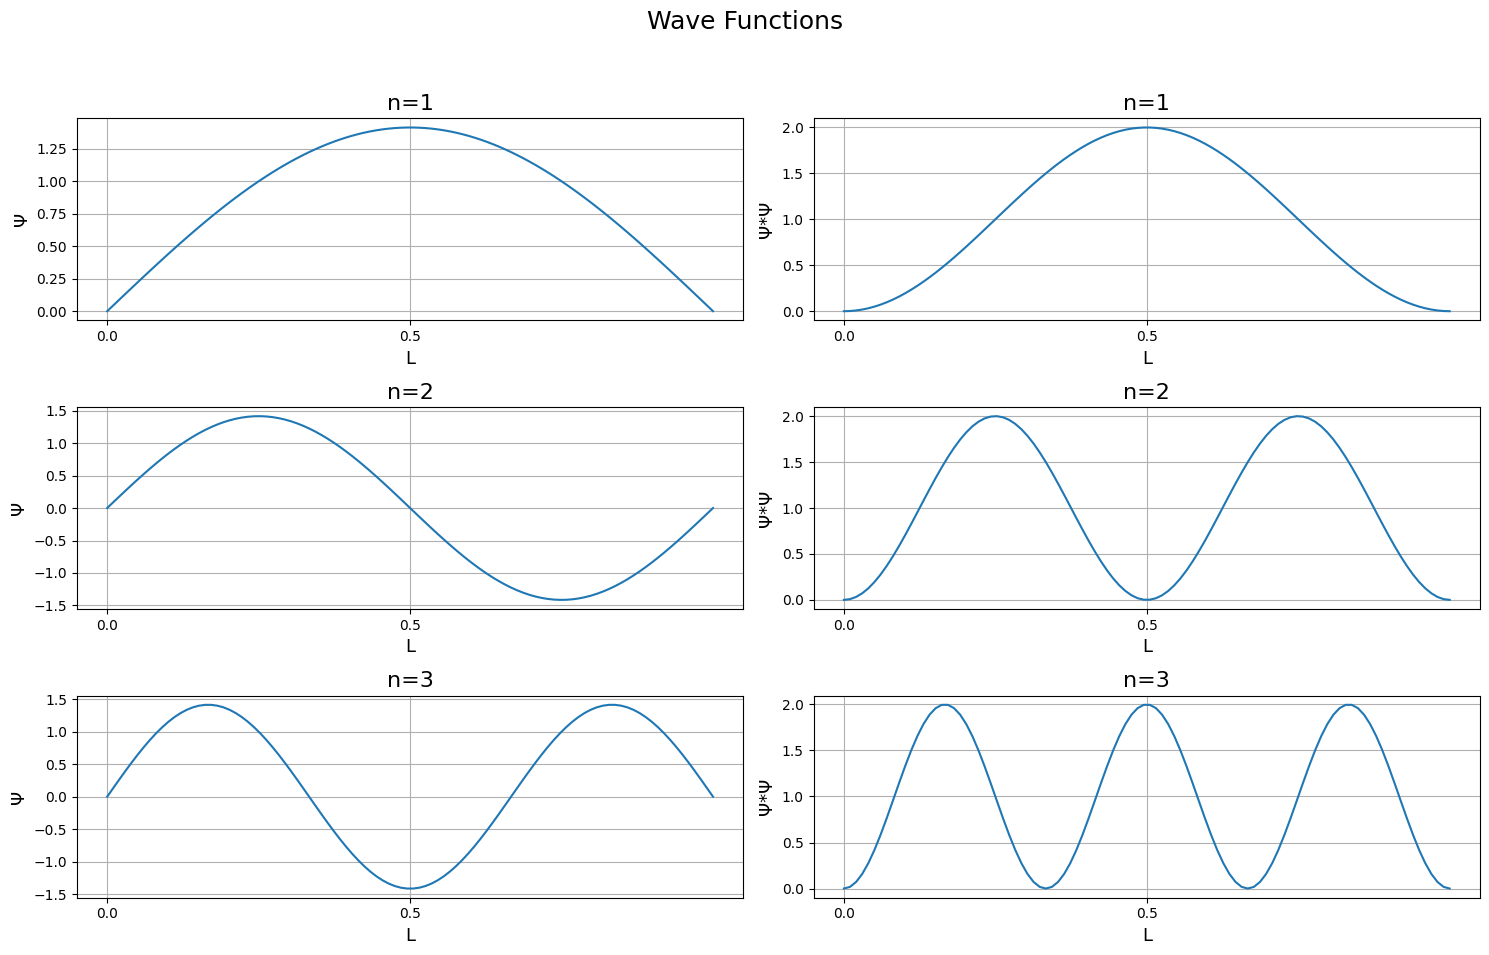

In [4]:
plt.figure(figsize=(15,10))
plt.suptitle("Wave Functions", fontsize=18)
for n in range(1,4):
    #Empty lists for energy and psi wave
    psi_2_list = []
    psi_list = []
    for x in x_list:
        psi_2_list.append(psi_2(n,L,x))
        psi_list.append(psi(n,L,x))
    plt.subplot(3,2,2*n-1)
    plt.plot(x_list, psi_list)
    plt.xlabel("L", fontsize=13)
    plt.ylabel("Ψ", fontsize=13)
    plt.xticks(np.arange(0, 1, step=0.5))
    plt.title("n="+str(n), fontsize=16)
    plt.grid()
    plt.subplot(3,2,2*n)
    plt.plot(x_list, psi_2_list)
    plt.xlabel("L", fontsize=13)
    plt.ylabel("Ψ*Ψ", fontsize=13)
    plt.xticks(np.arange(0, 1, step=0.5))
    plt.title("n="+str(n), fontsize=16)
    plt.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [5]:
#Random coordinates
x=np.linspace(0,1,30)
y=np.linspace(0,1,30)
z=np.linspace(0,1,30)

In [6]:
elements = []
probability = []
for ix in x:
    for iy in y:
        for iz in z:
            #Serialize into 1D object
            elements.append(str((ix,iy,iz)))
            probability.append(prob_1s(ix,iy,iz))

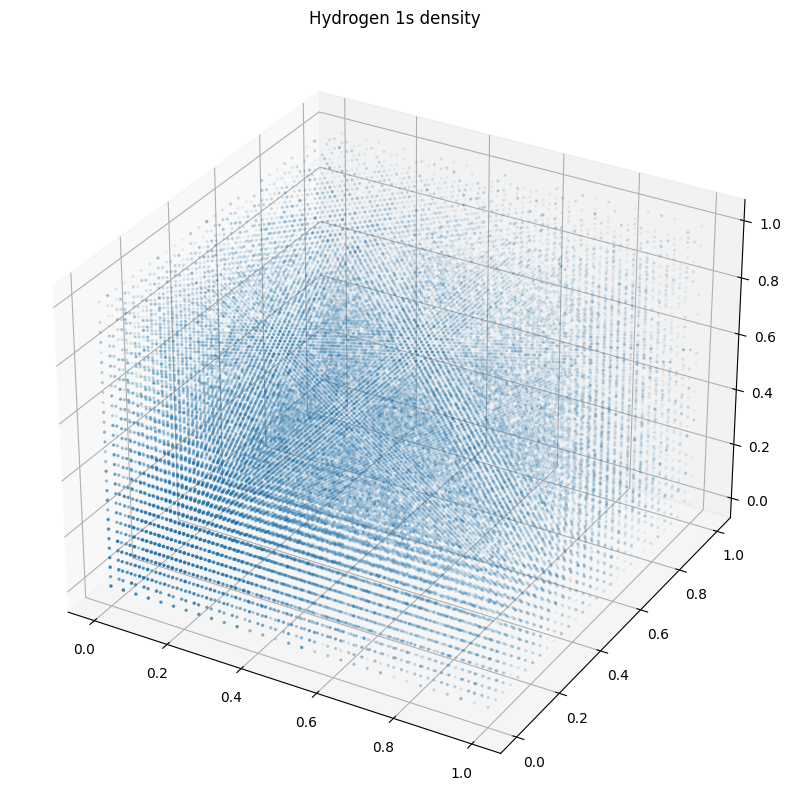

In [7]:
#Ensure sum of probability is 1
probability = probability/sum(probability)
#Getting electron coordinates based on probabiliy
coord = np.random.choice(elements, size=100000, replace=True, p=probability)
elem_mat = [i.split(',') for i in coord]
elem_mat = np.matrix(elem_mat)
x_coords = [float(i.item()[1:]) for i in elem_mat[:,0]] 
y_coords = [float(i.item()) for i in elem_mat[:,1]] 
z_coords = [float(i.item()[0:-1]) for i in elem_mat[:,2]]
#Plotting
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, alpha=0.05, s=2)
ax.set_title("Hydrogen 1s density")
plt.show()